<a href="https://colab.research.google.com/github/pixelcode009/-Mymlprojects/blob/master/Face_Recognition_and_Facial_Landmarks_Identification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install face_recognition  #installing face recognition module in python to ease the methods of retrieving data.


     |████████████████████████████████| 100.2MB 63kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566172 sha256=df46792f4ecdb04e529952329be31478af69f072bfb065502d6ee3e311a15bbd
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving face.png to face.png


#Hog Algorithm:

### The histogram of oriented gradients (HOG) is a feature descriptor used in computer vision and image processing for the purpose of object detection. The technique counts occurrences of gradient orientation in localized portions of an image. This method is similar to that of edge orientation histograms, scale-invariant feature transform descriptors, and shape contexts, but differs in that it is computed on a dense grid of uniformly spaced cells and uses overlapping local contrast normalization for improved accuracy.


##Why Hog Algorithm?

###Because we see Hog algorithm  as the most fastest and highly accurately predicted algorithms, as in comparison with CNN or Haar cascade.


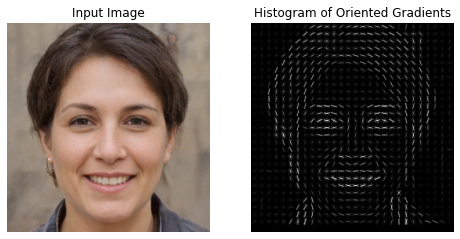

In [ ]:
import matplotlib.pyplot as plt
from skimage.feature import hog
from skimage import data,exposure #modules for processing images
import cv2
image=cv2.imread('/content/face.png')
image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)


fd, hog_image=hog(image,orientations=8,pixels_per_cell=(16,16),cells_per_block=(1,1),visualize=True,multichannel=True)

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(8,4),sharex=True,sharey=True)
ax1.axis('off')
ax1.imshow(image,cmap=plt.cm.gray)
ax1.set_title('Input Image')


hog_image_rescaled=exposure.rescale_intensity(hog_image,in_range=(0,10))     #Return image after stretching or shrinking its intensity levels

ax2.axis('off')
ax2.imshow(hog_image_rescaled,cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')

plt.show()

In [ ]:
len(fd)

6272

In [ ]:
image.shape



(463, 450, 3)

In [ ]:
import face_recognition
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle
import numpy as np
import cv2
%matplotlib inline

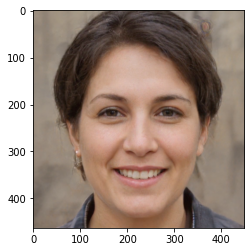

In [ ]:
image=cv2.imread('/content/face.png')
image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [ ]:
face_locations=face_recognition.face_locations(image)
face_num=len(face_locations)
print("Found {} of faces in the image.".format(face_num))


Found 1 of faces in the image.


A face is locate at top:349,left:82,bottom:409,right:142


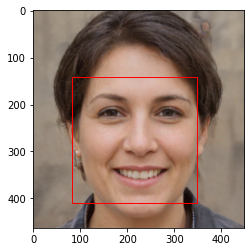

In [ ]:
plt.imshow(image)
ax=plt.gca()


for facel in face_locations:
  top,right,bottom,left=facel
  x,y,w,h=left,top,right,bottom
  print("A face is locate at top:{},left:{},bottom:{},right:{}".format(w,x,h,y))

  rect=Rectangle((x,y),w-x,h-y,fill=False,color='red')
  ax.add_patch(rect)

plt.show()
 

In [ ]:

image=cv2.imread('/content/drive/My Drive/howdynoody.jpg')
modi=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

image=cv2.imread('/content/drive/My Drive/trum womask.jpg')
trump=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)



In [ ]:
modi_encoding=face_recognition.face_encodings(modi)       #Face encodings provides a  list of 128-dimensional face encodings (one for each face in the image)
trump_encoding=face_recognition.face_encodings(trump)


known_encodings=[modi_encoding,trump_encoding]

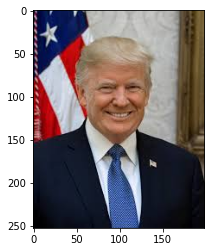

In [ ]:
image=cv2.imread('/content/drive/My Drive/tumptrial.jpg')
unknown=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(unknown)

unknown_encoding=face_recognition.face_encodings(unknown)

#Euclidean Distance concept in the project:
A very basic formula used for measuring distance metric. The KNN algorithm is based on this formula where p and q are dimensions of the known and unknown face encodings,
Therefore:

>


ed(p,q)=sqrt((q1-p1)^2..........(qn-pn)^2)

> 


so it  returns a numerical value.
This numerical value if is less than 0.6, then there are chances faces to have similarity in them.If more than or equal to 0.6, then the face is most likely to be only unknown.





In [ ]:
from scipy.spatial import distance

for ufe in unknown_encoding:
  results=[]
  for kfe in known_encodings:
    d=distance.euclidean(kfe,ufe)
    results.append(d)
  threshold=0.6
  results=np.array(results) <= threshold
  name="Unknown"
  if results[0]:
    name="Modi"
  elif results[1]: 
    name="Trump"
 
  print(f"Found {name} in the picture.")

Found Trump in the picture.


#Facial Landmarks:
Along with face recognition, i tried to detect the major parts which defines the  face  structure as well.
using face landmarks package, from module face recognition, it was bit easy to retieve the expected result.


In [ ]:
face_landmarks=face_recognition.face_landmarks(image)


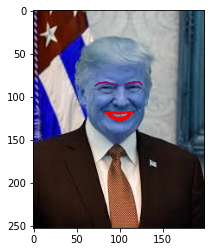

In [ ]:
import matplotlib.lines as mlines
from matplotlib.patches import Polygon
plt.imshow(image)
ax=plt.gca()

for fl in face_landmarks:
  lefteyeb=fl['left_eyebrow']
  px,py=lefteyeb[0]
  for(x,y) in lefteyeb[1:]:
    l=mlines.Line2D([px,x],[py,y],color='purple')
    ax.add_line(l)
    px,py=x,y



  righteyeb=fl['right_eyebrow']
  px,py=righteyeb[0]
  for(x,y) in righteyeb[1:]:
    l=mlines.Line2D([px,x],[py,y],color='purple')
    ax.add_line(l)
    px,py=x,y


  p=Polygon(fl['top_lip'],facecolor='red',edgecolor='red')
  ax.add_patch(p)
  p=Polygon(fl['bottom_lip'],facecolor='red',edgecolor='red')
  ax.add_patch(p)
 

  plt.show()